In [54]:
# modules and tools

import pathlib
import re
from collections import defaultdict
import pandas as pd
import plotly.express as px


# User settings

target_dir = pathlib.Path("/Users/will/Dropbox/zettelkasten/")
csv_file = '/Users/will/Dropbox/Projects/Dashboard/zkstats/stats.csv'
UUID_sign = "›"


# functions

def append_new_line(filename, text_to_append):
    # Append given text as a new line at the end of file
    # Open the file in append & read mode ('a+')
    with open(filename, "a+") as file_object:
        # Move read cursor to the start of file.
        file_object.seek(0)
        # If file is not empty then append '\n'
        data = file_object.read(100)
        if len(data) > 0:
            file_object.write("\n")
        # Append text at the end of file
        file_object.write(text_to_append)

# Initialize counters


tw = 0
tl = 0
tz = 0

# Regex

date_pattern = re.compile(r"\d{8}")
link_pattern = re.compile(r"((?<!{UUID_sign)\[\[\d{8})")

# Initalize output csv with headers

f = open(csv_file, "w+")
append_new_line(csv_file, "date,tz,tw,tl")

# Files is a dictionary mapping of a date to the list of files with that date

files = defaultdict(list)
for child in target_dir.iterdir():
    # Skip directories
    if child.is_dir():
        continue
    match = date_pattern.search(child.name)
    # Skip files that do not match the date pattern
    if match is None:
        continue
    file_date = match.group()
    files[file_date].append(child)

for date in sorted(files):

    for filename in files[date]:

         # Word Count
        file = open(filename, "r")
        data = file.read()
        words = data.split()
        w = len(words)
        tw += w

        # Link Count
        l = len(re.findall(link_pattern, data))
        tl += l

        # Zettel Count
        tz += 1

        # print(date,tz, tw, tl, w, l) # For troubleshooting
        # Set date range. Remove this line for totals.
        if date.startswith("2021"):
            append_new_line(csv_file, f"{date},{tz},{tw},{tl}")
            file.close()

In [56]:
import csv

def unique():
    with open(csv_file) as pkm:
        reader = csv.reader(pkm)
        csv_reader = csv.reader(pkm, delimiter=',')
        uniqueIds = set()

        for row in csv_reader:
            uniqueIds.add(row[0])
        return len(uniqueIds)   

    date = []
    tz = []
    tw = []
    tl = []


    # in this loop I did sum of column 1 which is revenue in csv file and counted total months which is column 0 
    for row in reader:

        tz.append(float(row[1]))
        tw.append(float(row[2]))
        tl.append(float(row[3]))
        date.append(row[0])

    zpd = round((tz)[-1]-(tz)[1])
    wpd = round((tw)[-1]-(tw)[1])
    lpd = round((tl)[-1]-(tl)[1])

output = f""" 
2021 Zettelkasten Analysis
Session or days on which some zettelkasting took place: {unique()}
{'-'*40}
Total Zettel: {zpd}
    Average # of Zettel per session: {round((zpd/unique()))}
Total Words: {wpd}
    Average # of Words per session: {round((wpd/unique()))}  
    Average # of Words per zettel: {round(wpd/zpd)}
Total Links: {lpd}
    Average # of Links created per session: {round((lpd/unique()))}
    Average # of Links per zettel: {round(lpd/zpd)}
    """

print(output)

 
2021 Zettelkasten Analysis
Session or days on which some zettelkasting took place: 250
----------------------------------------
Total Zettel: 714
    Average # of Zettel per session: 3
Total Words: 214290
    Average # of Words per session: 857  
    Average # of Words per zettel: 300
Total Links: 3414
    Average # of Links created per session: 14
    Average # of Links per zettel: 5
    


## Make Word Count Graph

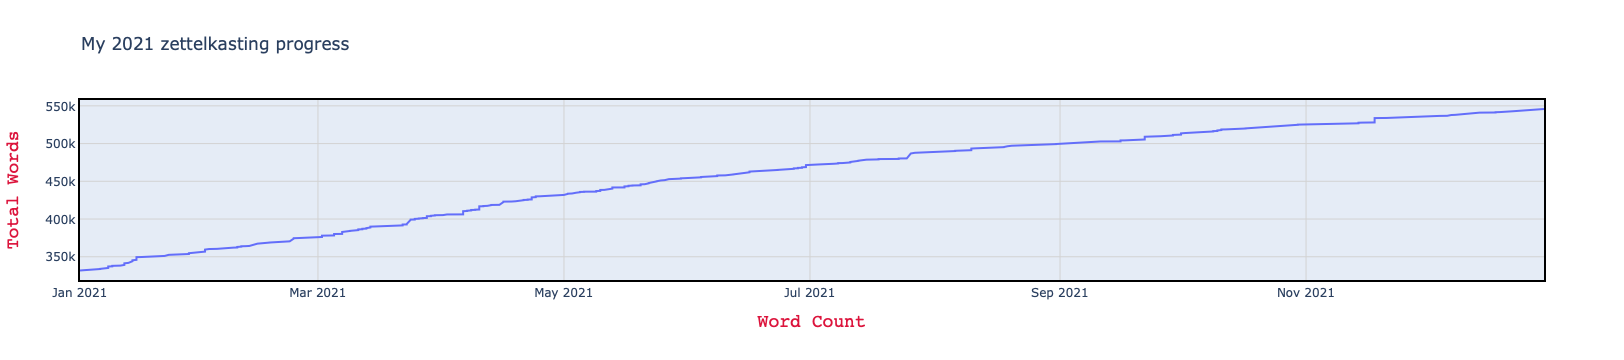

In [57]:
zk = pd.read_csv(csv_file)

zk['date'] = pd.to_datetime(zk['date'], format='%Y%m%d', errors='coerce')

fig = px.line(zk, x=zk['date'], y=zk['tw'], 
              title='My 2021 zettelkasting progress',
              labels=dict(date="Word Count", tw="Total Words",
              plot_bgcolor='rgb(200,200,200)',
              showlegend=True)
             )
fig.update_xaxes(title_font=dict(size=18, family='Courier', color='crimson'))
fig.update_yaxes(title_font=dict(size=18, family='Courier', color='crimson'))
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

fig.show()


## Make Link Count Graph

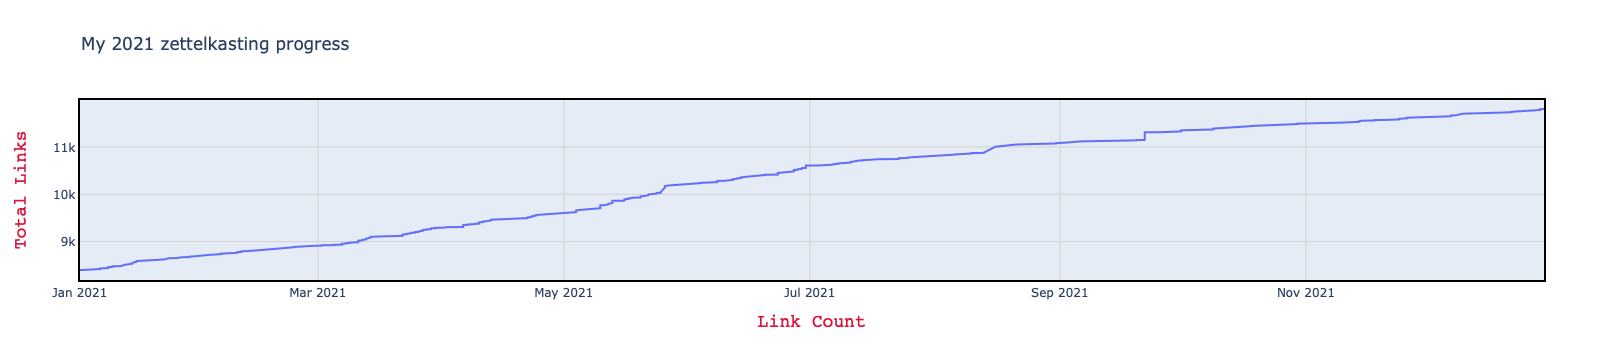

In [58]:
zk = pd.read_csv(csv_file)

zk['date'] = pd.to_datetime(zk['date'], format='%Y%m%d', errors='coerce')

fig = px.line(zk, x=zk['date'], y=zk['tl'], 
              title='My 2021 zettelkasting progress',
              labels=dict(date="Link Count" , tl="Total Links",
              plot_bgcolor='rgb(200,200,200)',
              showlegend=True)
             )
fig.update_xaxes(title_font=dict(size=18, family='Courier', color='crimson'))
fig.update_yaxes(title_font=dict(size=18, family='Courier', color='crimson'))
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)



fig.show()

## Make Zettel Count Graph

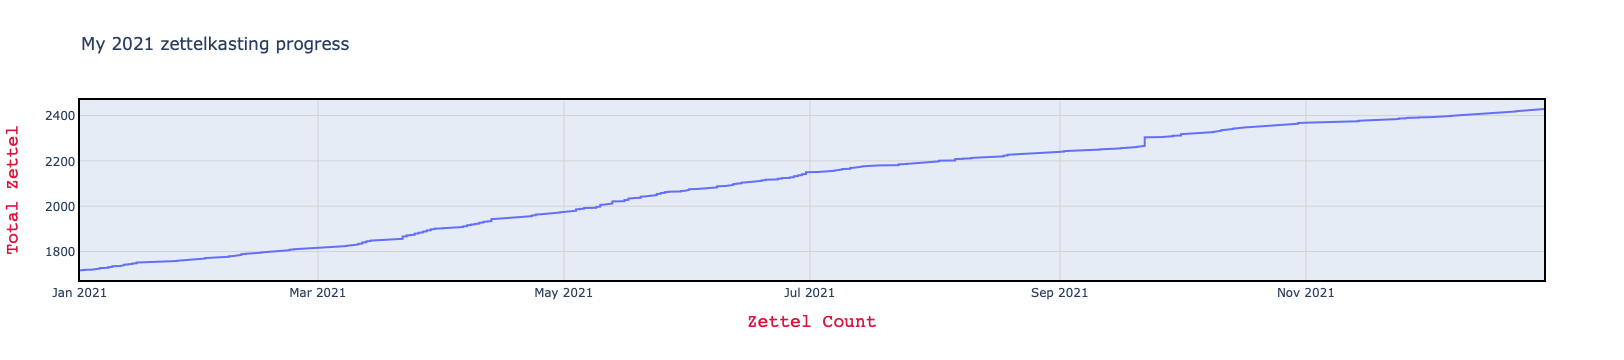

In [59]:
zk = pd.read_csv(csv_file)

zk['date'] = pd.to_datetime(zk['date'], format='%Y%m%d', errors='coerce')

fig = px.line(zk, x=zk['date'], y=zk['tz'], 
              title='My 2021 zettelkasting progress',
              labels=dict(date="Zettel Count", tz="Total Zettel",
              plot_bgcolor='rgb(200,200,200)',
              showlegend=True)
             )
fig.update_xaxes(title_font=dict(size=18, family='Courier', color='crimson'))
fig.update_yaxes(title_font=dict(size=18, family='Courier', color='crimson'))
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)


fig.show()